<a href="https://colab.research.google.com/github/Hamerson-jhoel/S-Sistemas-2025-1/blob/main/QUIZ_7_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hamerson Joel Piarpuezan

## Modelo de señal en banda base y RF

$d' = [d_i] \in R^8$, $a_i \in \{0,1\}$

$d_i \to a_i$

 $a' \in \{a_0, a_1\} : a_i V_i(t) \cos(W_o(t) + \phi_i (t))$ $\quad \forall t \in T$

$V_i (t) = \text{rect}_T (t)$

$\phi_i (t) = 0$

$a_i = 2i -1$

calcular la FFT DE un simbolo, y todos los simbolos juntos

Amplitud máxima lóbulo principal: 0.01000
Ancho de banda lóbulo principal: 100.00 Hz
Rango de frecuencia lóbulo principal: 550.00 Hz a 650.00 Hz
Primer lóbulo lateral en f = 672.04 Hz
Amplitud primer lóbulo lateral = -13.46 dB


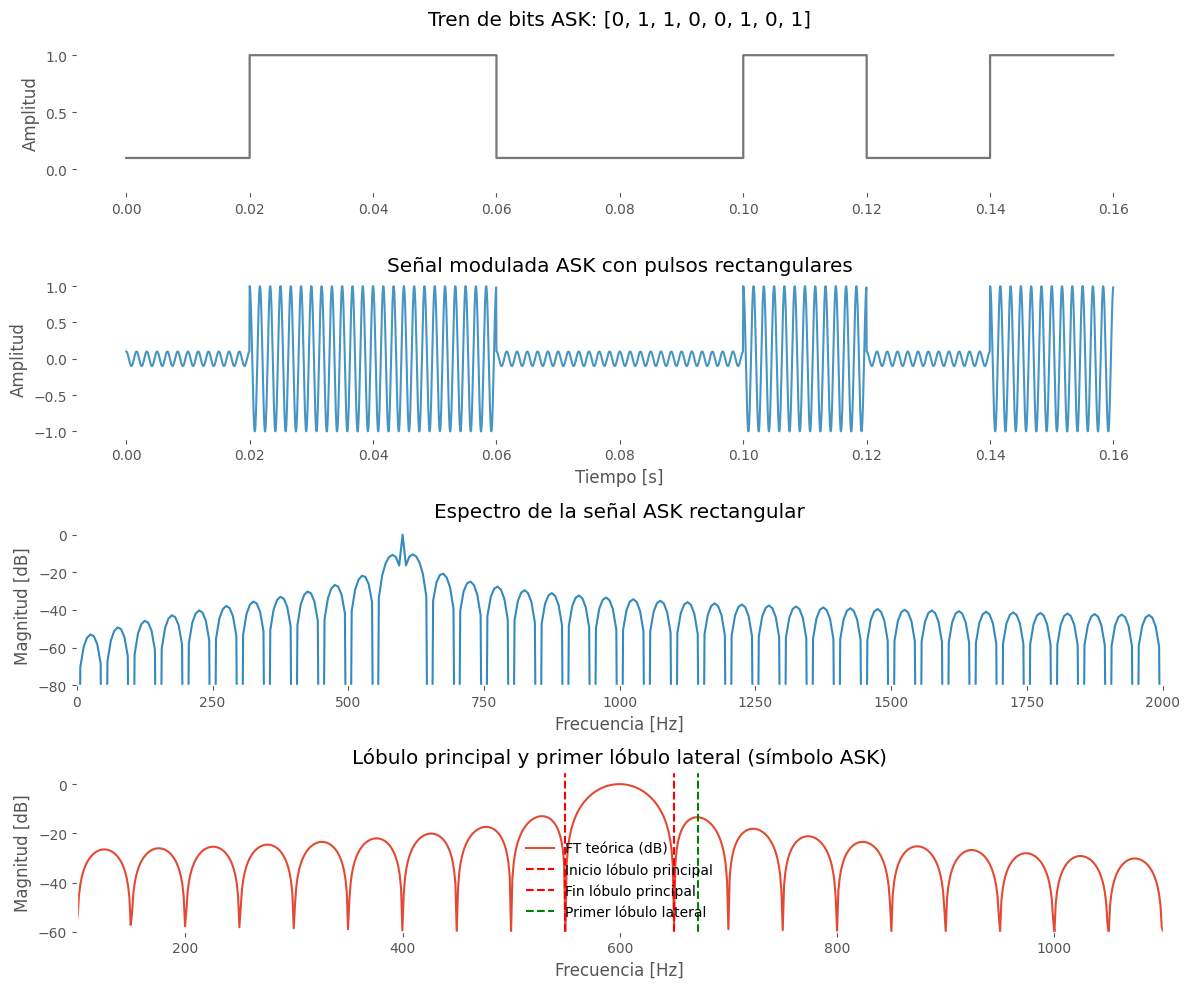

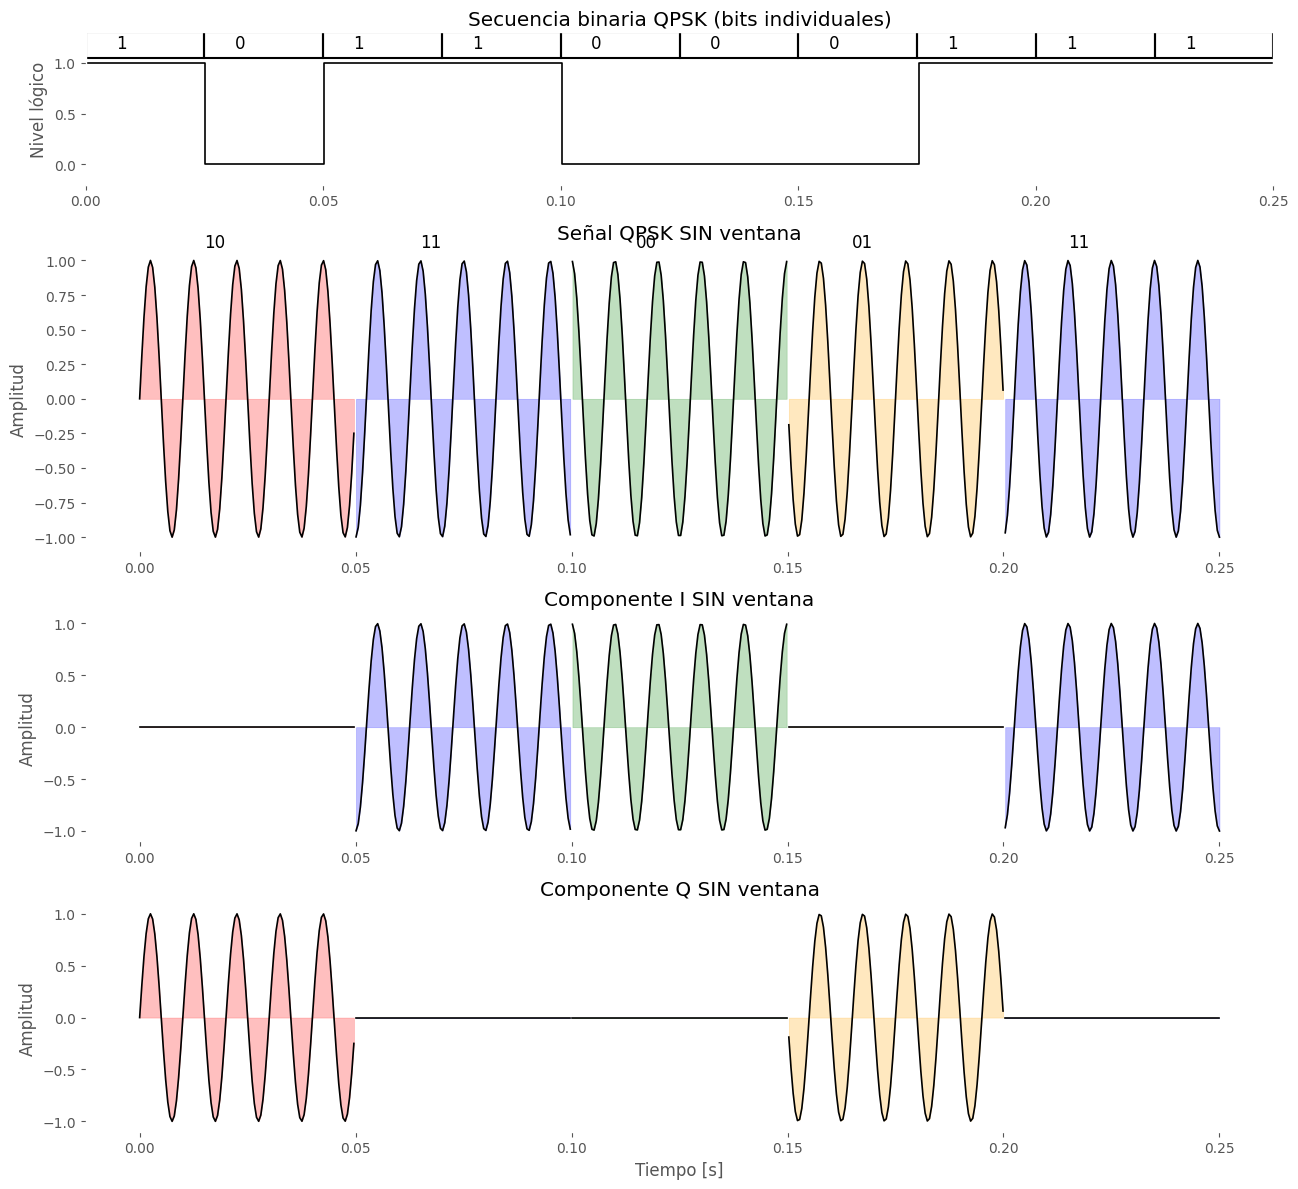

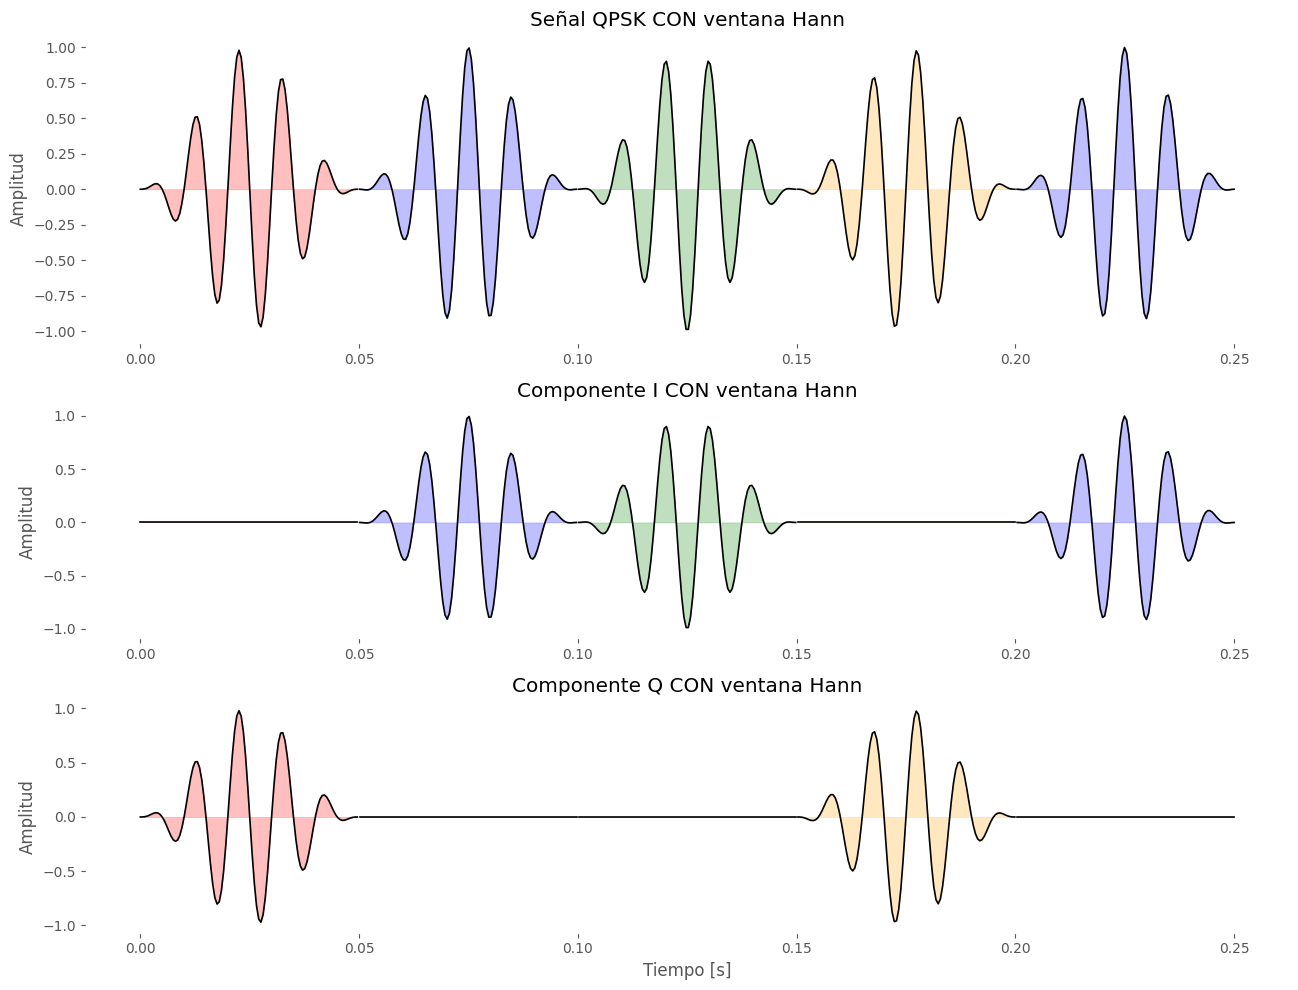

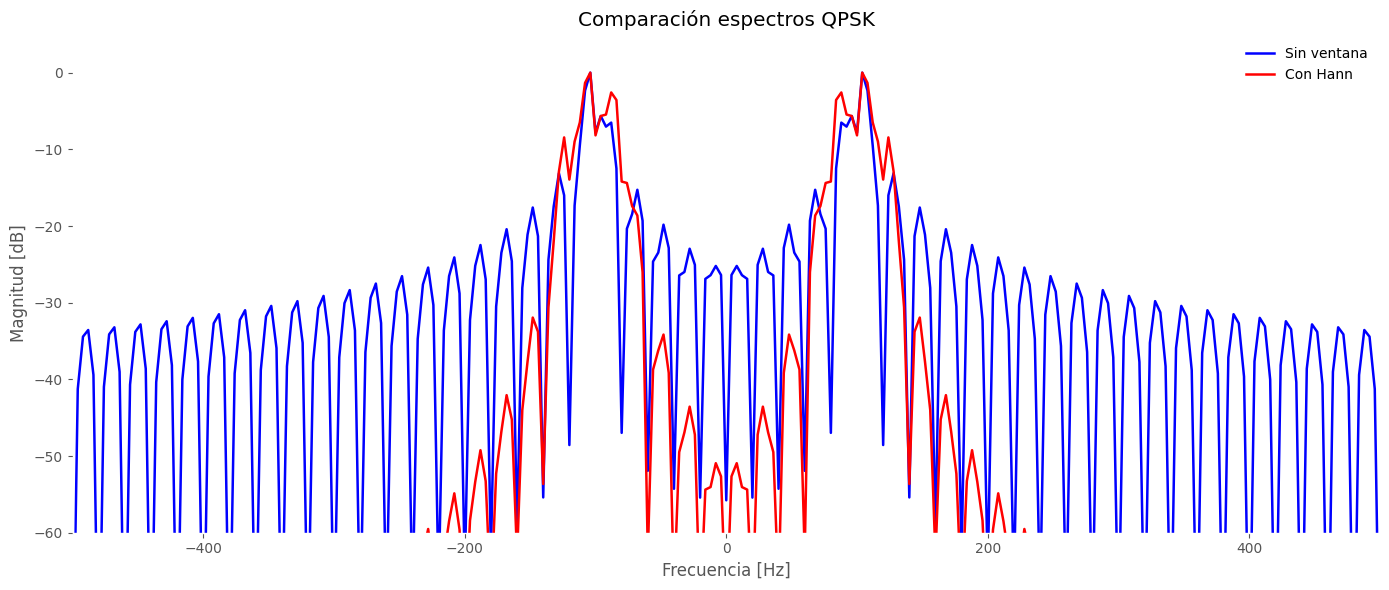

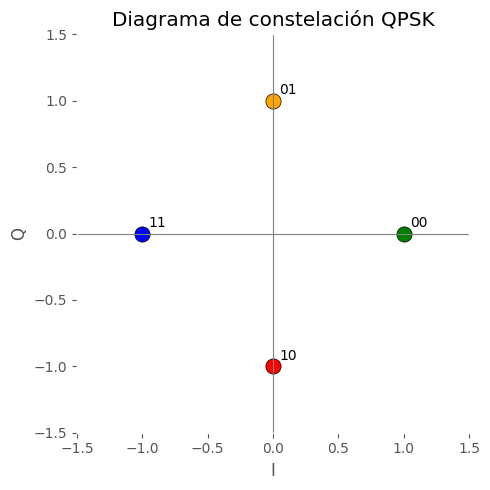

In [42]:
# ================================================================
# 🔹 CÓDIGO UNIFICADO: Tren de bits ASK + FT teórica + Visualización QPSK
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# ================================================================
# 🔹 CONFIGURACIÓN GLOBAL
# ================================================================
plt.rcParams['figure.facecolor'] = 'white'  # Fondo de la figura
plt.rcParams['axes.facecolor'] = 'white'    # Fondo del área de la gráfica
plt.rcParams['legend.frameon'] = False      # Sin fondo en la leyenda

# ================================================================
# 🔹 SECCIÓN 1: Tren de bits ASK
# ================================================================
bits_ask = np.array([0, 1, 1, 0, 0, 1, 0, 1])
fs_ask = 20000
Tsym_ask = 0.02
fc_ask = 600
phi0_ask = 0
A1 = 1.0
A0 = 0.1

t_sym = np.arange(0, Tsym_ask, 1/fs_ask)
t_ask = np.concatenate([t_sym + k*Tsym_ask for k in range(len(bits_ask))])
Nsym = len(t_sym)

m_t = np.zeros_like(t_ask)
for k, b in enumerate(bits_ask):
    m_t[k*Nsym:(k+1)*Nsym] = A1 if b == 1 else A0

carrier = np.cos(2*np.pi*fc_ask*t_ask + phi0_ask)
s_rect = m_t * carrier

def fft_mag_db(x, fs):
    N = len(x)
    X = np.fft.fftshift(np.fft.fft(x))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    mag_db = 20*np.log10(np.abs(X)/(np.max(np.abs(X))+1e-12))
    return f, mag_db

f_ask, spec_rect = fft_mag_db(s_rect, fs_ask)

plt.figure(figsize=(12,10))

plt.subplot(4,1,1)
plt.step(t_ask, m_t, where='post', color='C3', linewidth=1.6)
plt.title(f'Tren de bits ASK: {bits_ask.tolist()}')
plt.ylabel('Amplitud')
plt.ylim(-0.2, 1.2)
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(t_ask, s_rect, color='C1', alpha=0.9)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.title('Señal modulada ASK con pulsos rectangulares')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(f_ask, spec_rect, color='C1')
plt.xlim(0, 2000)
plt.ylim(-80, 5)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Espectro de la señal ASK rectangular')
plt.grid(True)

# FT teórica de un símbolo
a1 = 1.0
bit = 1
phi = 2*bit - 1
t_symbol = np.arange(0, Tsym_ask, 1/fs_ask)
rect = np.ones_like(t_symbol)
s_symbol = a1 * rect * np.cos(2*np.pi*fc_ask*t_symbol + phi)

def sinc(x):
    return np.where(np.abs(x) < 1e-12, 1.0, np.sin(np.pi*x)/(np.pi*x))

Nfft = 2**14
f_grid = np.linspace(-fs_ask/2, fs_ask/2, Nfft)
prefactor = a1 * Tsym_ask / 2
term_pos = np.exp(1j*phi) * np.exp(-1j*np.pi*(f_grid - fc_ask)*Tsym_ask) * sinc((f_grid - fc_ask)*Tsym_ask)
term_neg = np.exp(-1j*phi) * np.exp(-1j*np.pi*(f_grid + fc_ask)*Tsym_ask) * sinc((f_grid + fc_ask)*Tsym_ask)
S_theo = prefactor * (term_pos + term_neg)
S_theo_mag = np.abs(S_theo)

amp_peak = np.max(S_theo_mag)
f_low = fc_ask - 1/Tsym_ask
f_high = fc_ask + 1/Tsym_ask
BW_mainlobe = f_high - f_low
print(f"Amplitud máxima lóbulo principal: {amp_peak:.5f}")
print(f"Ancho de banda lóbulo principal: {BW_mainlobe:.2f} Hz")
print(f"Rango de frecuencia lóbulo principal: {f_low:.2f} Hz a {f_high:.2f} Hz")

S_norm = S_theo_mag / np.max(S_theo_mag)
idx_start = np.searchsorted(f_grid, f_high)
idx_lateral = idx_start + np.argmax(S_norm[idx_start:])
f_lateral = f_grid[idx_lateral]
amp_lateral_db = 20*np.log10(S_norm[idx_lateral])
print(f"Primer lóbulo lateral en f = {f_lateral:.2f} Hz")
print(f"Amplitud primer lóbulo lateral = {amp_lateral_db:.2f} dB")

plt.subplot(4,1,4)
plt.plot(f_grid, 20*np.log10(S_theo_mag/np.max(S_theo_mag)+1e-12), label='FT teórica (dB)')
plt.axvline(f_low, color='r', linestyle='--', label='Inicio lóbulo principal')
plt.axvline(f_high, color='r', linestyle='--', label='Fin lóbulo principal')
plt.axvline(f_lateral, color='g', linestyle='--', label='Primer lóbulo lateral')
plt.xlim(fc_ask-500, fc_ask+500)
plt.ylim(-60, 5)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.title("Lóbulo principal y primer lóbulo lateral (símbolo ASK)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ================================================================
# 🔹 SECCIÓN 2: Visualización QPSK
# ================================================================
fs_qpsk = 2000
fc_qpsk = 100
Tb = 0.025
Ts = 2 * Tb
bits_qpsk = np.array([1,0, 1,1, 0,0, 0,1, 1,1])
Ns_bit = int(fs_qpsk * Tb)
Ns_sym = int(fs_qpsk * Ts)

symbols = bits_qpsk.reshape(-1, 2)
mapping = {(0,0):0, (0,1):np.pi/2, (1,1):np.pi, (1,0):3*np.pi/2}
color_map = {(1,0): 'red', (1,1): 'blue', (0,0): 'green', (0,1): 'orange'}

t_bits = np.linspace(0, Tb * len(bits_qpsk), Ns_bit * len(bits_qpsk))
bit_signal = np.repeat(bits_qpsk, Ns_bit)

t_total = np.linspace(0, Ts * len(symbols), Ns_sym * len(symbols))
signal_sin_ventana = np.zeros_like(t_total)
I_signal_sin_ventana = np.zeros_like(t_total)
Q_signal_sin_ventana = np.zeros_like(t_total)

for i, sym in enumerate(symbols):
    phi = mapping[tuple(sym)]
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym] = np.cos(2*np.pi*fc_qpsk*t + phi)
    I_signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym] = np.cos(phi) * np.cos(2*np.pi*fc_qpsk*t)
    Q_signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym] = -np.sin(phi) * np.sin(2*np.pi*fc_qpsk*t)

signal_con_hann = np.zeros_like(t_total)
I_signal_con_hann = np.zeros_like(t_total)
Q_signal_con_hann = np.zeros_like(t_total)
hann_window = np.hanning(Ns_sym)

for i, sym in enumerate(symbols):
    phi = mapping[tuple(sym)]
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    sig_segment = np.cos(2*np.pi*fc_qpsk*t + phi)
    I_segment = np.cos(phi) * np.cos(2*np.pi*fc_qpsk*t)
    Q_segment = -np.sin(phi) * np.sin(2*np.pi*fc_qpsk*t)

    signal_con_hann[i*Ns_sym:(i+1)*Ns_sym] = sig_segment * hann_window
    I_signal_con_hann[i*Ns_sym:(i+1)*Ns_sym] = I_segment * hann_window
    Q_signal_con_hann[i*Ns_sym:(i+1)*Ns_sym] = Q_segment * hann_window

# 🔹 FIGURA 1: QPSK sin ventana
fig, axs = plt.subplots(4, 1, figsize=(13, 12), gridspec_kw={'height_ratios': [1, 2, 1.5, 1.5]})
plt.subplots_adjust(hspace=0.4)
axs[0].step(t_bits, bit_signal, where='post', color='k', linewidth=1.2)
axs[0].set_ylim([-0.2, 1.3])
axs[0].set_xlim([0, len(bits_qpsk)*Tb])
axs[0].set_title("Secuencia binaria QPSK (bits individuales)")
axs[0].set_ylabel("Nivel lógico")
axs[0].grid(True, ls='--', alpha=0.4)
for i, b in enumerate(bits_qpsk):
    axs[0].add_patch(Rectangle((i*Tb, 1.05), Tb, 0.25, fill=False, edgecolor='k', linewidth=1.5))
    axs[0].text(i*Tb + Tb/2 - 0.005, 1.15, str(b), fontsize=12, ha='center')

axs[1].set_title("Señal QPSK SIN ventana")
axs[1].set_ylabel("Amplitud")
axs[1].grid(True, alpha=0.3)
for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[1].plot(t, signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[1].fill_between(t, signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)
    axs[1].text(i*Ts + Ts/2 - 0.01, 1.1, f"{sym[0]}{sym[1]}", fontsize=12)

axs[2].set_title("Componente I SIN ventana")
axs[2].set_ylabel("Amplitud")
axs[2].grid(True, alpha=0.3)
for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[2].plot(t, I_signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[2].fill_between(t, I_signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)

axs[3].set_title("Componente Q SIN ventana")
axs[3].set_xlabel("Tiempo [s]")
axs[3].set_ylabel("Amplitud")
axs[3].grid(True, alpha=0.3)
for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[3].plot(t, Q_signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[3].fill_between(t, Q_signal_sin_ventana[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)
plt.tight_layout()
plt.show()

# 🔹 FIGURA 2: QPSK con ventana Hann
fig, axs = plt.subplots(3, 1, figsize=(13, 10), gridspec_kw={'height_ratios': [2, 1.5, 1.5]})
plt.subplots_adjust(hspace=0.4)
axs[0].set_title("Señal QPSK CON ventana Hann")
axs[0].set_ylabel("Amplitud")
axs[0].grid(True, alpha=0.3)
for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[0].plot(t, signal_con_hann[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[0].fill_between(t, signal_con_hann[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)

axs[1].set_title("Componente I CON ventana Hann")
axs[1].set_ylabel("Amplitud")
axs[1].grid(True, alpha=0.3)
for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[1].plot(t, I_signal_con_hann[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[1].fill_between(t, I_signal_con_hann[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)

axs[2].set_title("Componente Q CON ventana Hann")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud")
axs[2].grid(True, alpha=0.3)
for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[2].plot(t, Q_signal_con_hann[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[2].fill_between(t, Q_signal_con_hann[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)
plt.tight_layout()
plt.show()

# 🔹 FIGURA 3: Comparación espectros QPSK
N = len(signal_sin_ventana)
S_sin = np.fft.fftshift(np.fft.fft(signal_sin_ventana))
f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs_qpsk))
S_mag_sin = np.abs(S_sin)/np.max(np.abs(S_sin))
S_db_sin = 20*np.log10(S_mag_sin+1e-12)

S_hann = np.fft.fftshift(np.fft.fft(signal_con_hann))
S_mag_hann = np.abs(S_hann)/np.max(np.abs(S_hann))
S_db_hann = 20*np.log10(S_mag_hann+1e-12)

plt.figure(figsize=(14,6))
plt.plot(f, S_db_sin, color='blue', linewidth=1.8, label='Sin ventana')
plt.plot(f, S_db_hann, color='red', linewidth=1.8, label='Con Hann')
plt.title('Comparación espectros QPSK')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', alpha=0.3)
plt.xlim([-500, 500])
plt.ylim([-60, 5])
plt.legend()
plt.tight_layout()
plt.show()

# 🔹 FIGURA 4: Diagrama de constelación QPSK
plt.figure(figsize=(5,5))
plt.title("Diagrama de constelación QPSK")
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
const_points = {"00": (1,0), "01": (0,1), "11": (-1,0), "10": (0,-1)}
for label, (x, y) in const_points.items():
    plt.scatter(x, y, s=120, color=color_map[(int(label[0]), int(label[1]))], edgecolors='k')
    plt.text(x+0.05, y+0.05, label)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("I")
plt.ylabel("Q")
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
